# **Introduction**

In this project, I will walk through solving a complete machine learning problem using the dataset of fuel economy taken from [fueleconomy.gov](https://www.fueleconomy.gov/feg/ws/index.shtml#vehicle), and try to develop a model that can determine what affects fuel costs the most, and then interpret the results. All data descriptions are in the Readme


Structure of this project:

1. Load in the data and examine
2. Exploratory data analysis
3. Feature engineering and selection
4. Establish a baseline and compare several machine learning models on a performance metric
5. Perform hyperparameter tuning on the best model to optimize it for the problem
6. Evaluate the best model on the testing set



 After all I interpret the model results to the extent possible








For convenience, the project is divided into two notebooks.

This notebook will cover the first three steps of the pipeline with the other parts discussed in second notebook

# **Imports**

In [ ]:
# import library for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
from scipy import stats
from scipy.stats import norm
import warnings

warnings.filterwarnings('ignore')

### *Load in the Data and Examine*

In [ ]:
# Load and read data
data = pd.read_csv('vehicles.csv')
data.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,14.167143,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,27.046364,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,11.018889,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,27.046364,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,15.658421,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [ ]:
data.describe()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
count,45525.000000,45525.000000,45525.0,45525.000000,45525.000000,45525.000000,45525.000000,45525.000000,45525.000000,45525.000000,...,45525.000000,45525.000000,45525.000000,45525.000000,45525.000000,45525.000000,45525.000000,45525.000000,45525.000000,45525.000000
mean,15.367278,0.189634,0.0,0.093243,18.953125,7.758234,0.829061,0.698859,0.000501,0.608982,...,24.043631,1.100113,35.155499,0.884697,2003.450412,-5330.422845,0.016112,0.264294,0.267150,0.264382
std,4.289698,0.976668,0.0,0.897977,9.683471,13.649170,6.376695,6.285864,0.037375,5.310647,...,13.787816,9.009790,12.876006,5.667478,12.112226,4474.185847,0.327983,3.726115,3.608891,3.649460
min,0.047081,0.000000,0.0,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1984.000000,-39000.000000,0.000000,0.000000,0.000000,0.000000
25%,12.935217,0.000000,0.0,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.506500,0.000000,28.000000,0.000000,1992.000000,-8000.000000,0.000000,0.000000,0.000000,0.000000
50%,14.875500,0.000000,0.0,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21.899500,0.000000,33.597000,0.000000,2004.000000,-5250.000000,0.000000,0.000000,0.000000,0.000000
75%,17.500588,0.000000,0.0,0.000000,21.000000,16.779000,0.000000,0.000000,0.000000,0.000000,...,26.300000,0.000000,39.700000,0.000000,2014.000000,-2500.000000,0.000000,0.000000,0.000000,0.000000
max,42.501429,16.528333,0.0,15.300000,150.000000,150.195800,145.000000,145.083500,5.350000,122.000000,...,224.800000,207.262200,187.100000,173.143600,2023.000000,8000.000000,9.600000,97.000000,81.000000,88.000000


We need to predict fuel economy, according to the description, the column "youSaveSpend" is suitable as a target, which means how much we will spend (or save) over 5 years of using the car. Let's look at target in more detail

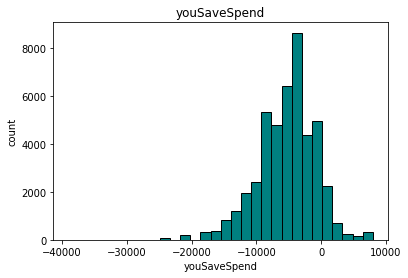

In [ ]:
plt.style.use('fivethirtyeight')
plt.hist(data['youSaveSpend'].dropna(), bins = 30, edgecolor = 'k', color='#008080');
plt.xlabel('youSaveSpend'); plt.ylabel('count');
plt.title('youSaveSpend');

Let's find out what features can be distinguished from the dataset

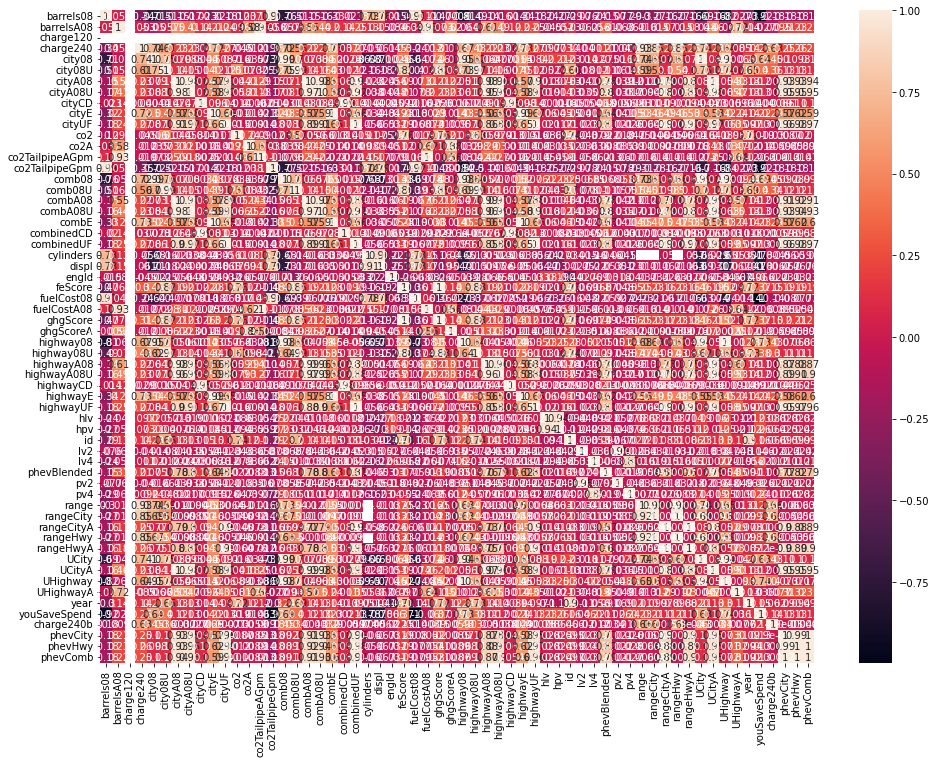

In [ ]:
#correlation matrix
corrmat =  data.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corrmat, annot=True, fmt='.2g')

From this matrix, little can be understood, let's highlight the features that are most correlated with target

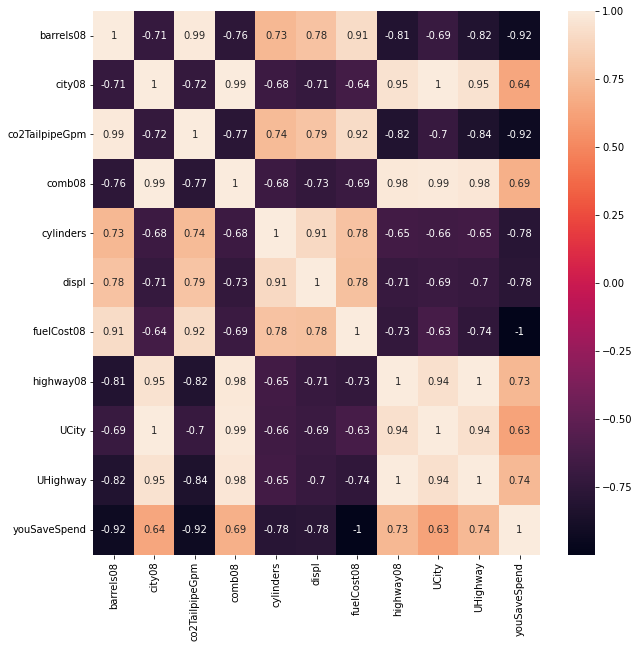

In [ ]:
# most correlated features
top_corr_features = corrmat.index[abs(corrmat['youSaveSpend'])>0.5]
plt.figure(figsize=(10,10))
sns.heatmap(data[top_corr_features].corr(), annot=True)


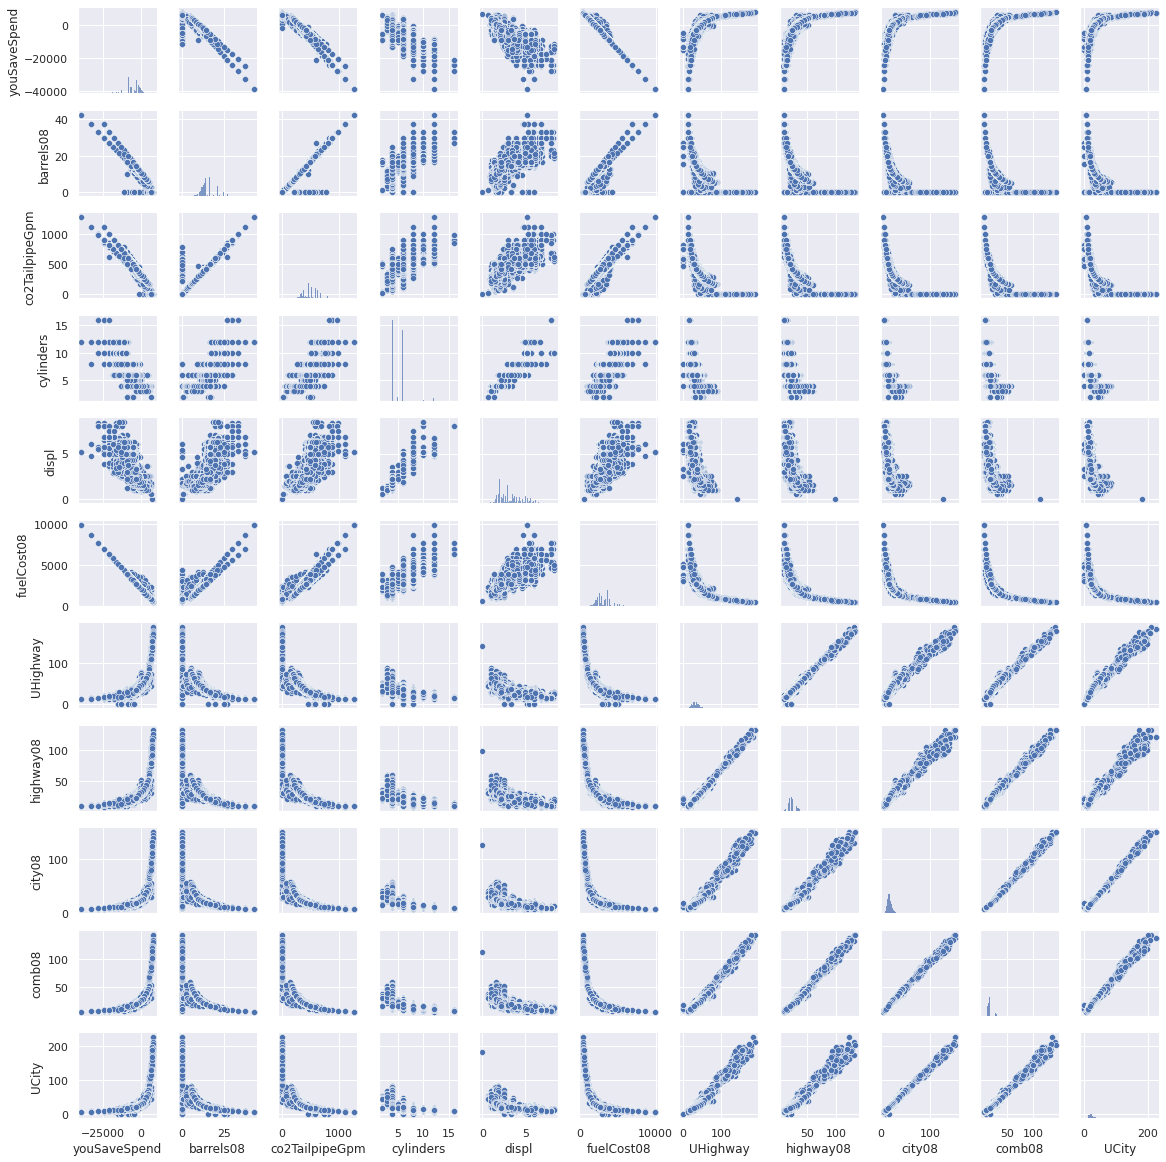

In [ ]:
sns.set()
cols = ['youSaveSpend', 'barrels08', 'co2TailpipeGpm', 'cylinders', 'displ', 'fuelCost08', 'UHighway', 'highway08', 'city08', 'comb08', 'UCity']
sns.pairplot(data[cols], height = 1.5)
plt.show()

It can be seen that there are many correlated features in the dataset and one "fuelCost" feature has a strong correlation with the target.

Let's look at the correlation of some features

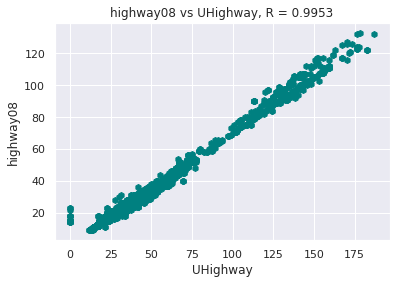

In [ ]:
plot_data = data[['highway08', 'UHighway']].dropna()

plt.plot(plot_data['UHighway'], plot_data['highway08'], color='#008080', marker='h', linestyle='None')
plt.xlabel('UHighway'); plt.ylabel('highway08')
plt.title('highway08 vs UHighway, R = %0.4f' % np.corrcoef(data[['highway08', 'UHighway']].dropna(), rowvar=False)[0][1]);


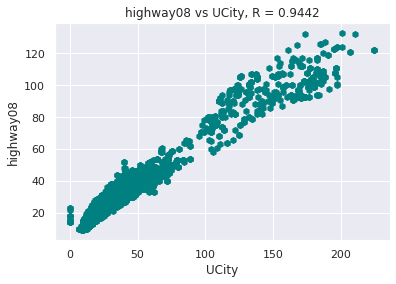

In [ ]:
plot_data = data[['highway08', 'UCity']].dropna()

plt.plot(plot_data['UCity'], plot_data['highway08'], color='#008080', marker='h', linestyle='None')
plt.xlabel('UCity'); plt.ylabel('highway08')
plt.title('highway08 vs UCity, R = %0.4f' % np.corrcoef(data[['highway08', 'UCity']].dropna(), rowvar=False)[0][1]);

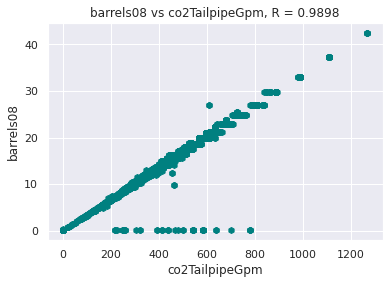

In [ ]:
plot_data = data[['barrels08', 'co2TailpipeGpm']].dropna()

plt.plot(plot_data['co2TailpipeGpm'], plot_data['barrels08'], color='#008080', marker='h', linestyle='None')
plt.xlabel('co2TailpipeGpm'); plt.ylabel('barrels08')
plt.title('barrels08 vs co2TailpipeGpm, R = %0.4f' % np.corrcoef(data[['barrels08', 'co2TailpipeGpm']].dropna(), rowvar=False)[0][1]);

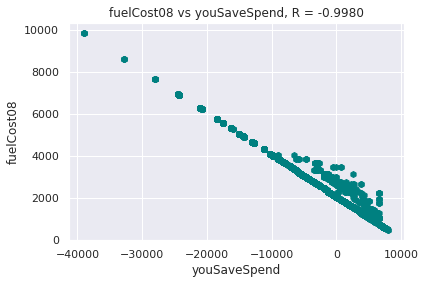

In [ ]:
plot_data = data[['fuelCost08', 'youSaveSpend']].dropna()

plt.plot(plot_data['youSaveSpend'], plot_data['fuelCost08'], color='#008080', marker='h', linestyle='None')
plt.xlabel('youSaveSpend'); plt.ylabel('fuelCost08')
plt.title('fuelCost08 vs youSaveSpend, R = %0.4f' % np.corrcoef(data[['fuelCost08', 'youSaveSpend']].dropna(), rowvar=False)[0][1]);

Some features are highly correlated.

"FuelCost" is highly correlated with the target, will keep this in mind

If you look at the description of the dataset, then there are data such as transmission, "feScore" and drive. Check the importance of features

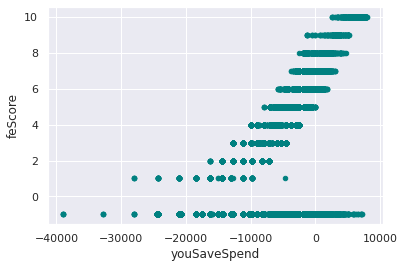

In [ ]:
data2 = pd.concat([data['feScore'], data['youSaveSpend']], axis=1)
data2.plot.scatter(x='youSaveSpend', y='feScore', color='#008080', marker='o', linestyle='None')

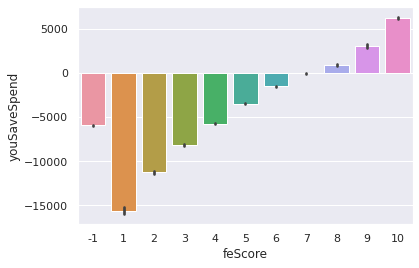

In [ ]:
sns.barplot(data.feScore, data.youSaveSpend)

There is a correlation, but there seems to be too many -1 values. According to the description, these are missing values. Let's process them and see the percentage of missed ones.

In [ ]:
data['feScore'].replace(-1, np.NaN, inplace=True)

mis_percent = int((100 * data['feScore'].isnull().sum() / len(data['feScore'])).round())
print(f'Percentage missed: {mis_percent}%')

Percentage missed: 70%


70 dataset is missing. Feature won't do us any benefit

In [ ]:
data = data.drop(['feScore'], axis=1)

### **Check transmission and drive**

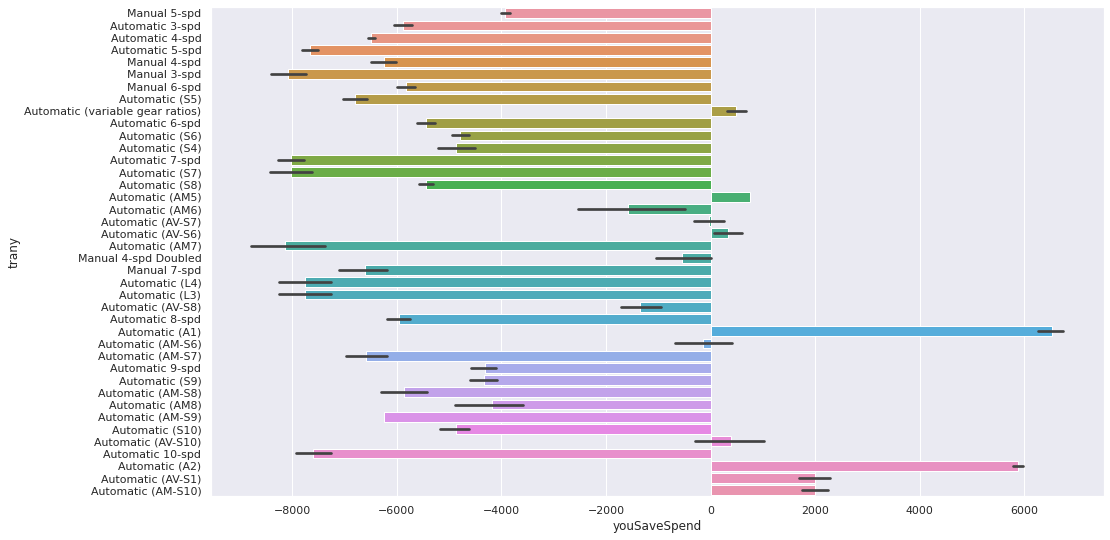

In [ ]:
sns.set()
plt.figure(figsize = (16,9))
sns.barplot(data.youSaveSpend, data.trany)

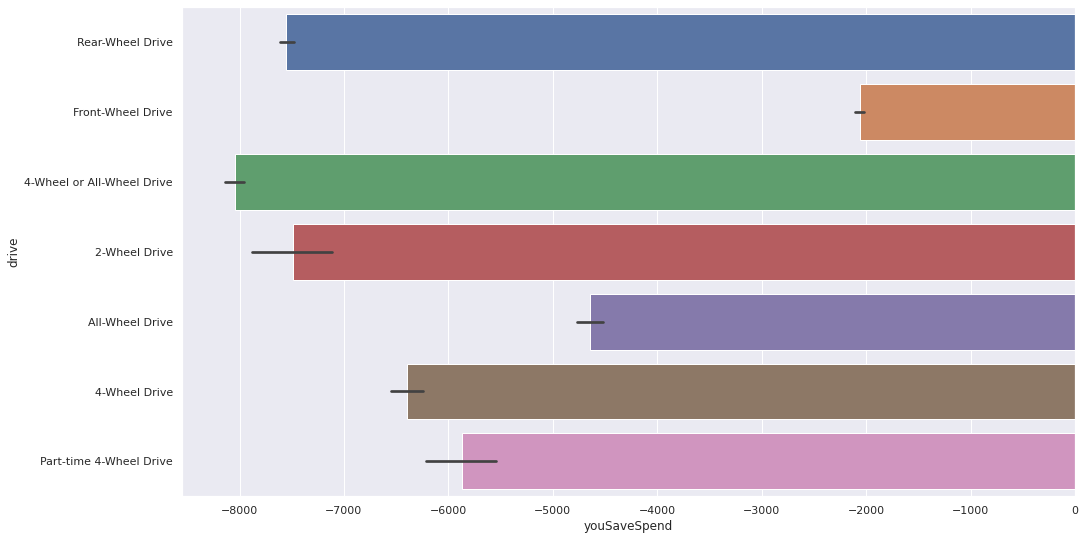

In [ ]:
sns.set()
plt.figure(figsize = (16,9))
sns.barplot(data.youSaveSpend, data.drive)

It can be seen that the transmission matters and front-wheel drive cars consume less consumption.

Let's take a closer look at "fuelCost" to see why some of the values are different.

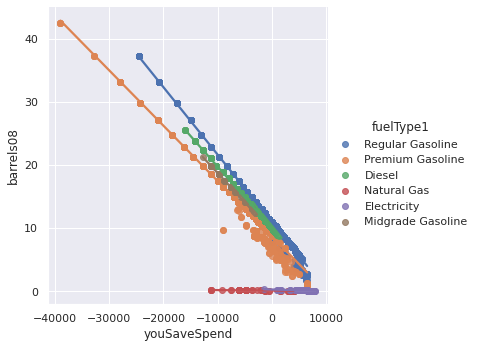

In [ ]:
sns.lmplot(x="youSaveSpend", y="barrels08", hue="fuelType1", data=data)

# **Feature Engineering and Selection**

Now that we have explored the trends and relationships within the data, we can work on engineering a set of features for our models. We can use the results of the EDA to inform this feature engineering. In particular, we learned the following from EDA which can help us in engineering/selecting features:


*   there is a lot of data in the dataset that does not help in determining the target
*   we have categorical data that can be useful for the model







we will take the following steps for feature engineering:

* One-hot encode the categorical variables
* fill in or remove missing values
* Add in the log transformation of some numerical variables







In [ ]:
# import encoder for encoding features
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

Let's make categorical data. But we have missing values. It is important not to touch them. I will replace them with medians or mode later.

In [ ]:
data[['trany', 'drive', 'fuelType1']].isnull().sum()

trany          11
drive        1186
fuelType1       0
dtype: int64

In [ ]:
# encoding
le = LabelEncoder()

df_raw = data[['trany', 'drive']]

df_temp = df_raw.astype("str").apply(LabelEncoder().fit_transform)
data[['trany', 'drive']] = df_temp.where(~df_raw.isna(), df_raw)

df_temp = df_raw.astype("category").apply(lambda x: x.cat.codes)
data[['trany', 'drive']] = df_temp.where(~df_raw.isna(), df_raw)

data['fuelType1'] = le.fit_transform(data['fuelType1'])


In [ ]:
# check if our missing values have changed
data[['trany', 'drive']].isnull().sum()

trany      11
drive    1186
dtype: int64

# **Missing value**

Now that we have encoded the data, we can start working with the missing data.

Following is a function that calculates the number of missing values and the percentage of the total values that are missing for each column. I found it online in a [Stack Overflow forum](https://stackoverflow.com/questions/26266362/how-do-i-count-the-nan-values-in-a-column-in-pandas-dataframe/39734251#39734251)

In [ ]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [ ]:
missing_values_table(data)

Your selected dataframe has 82 columns.
There are 18 columns that have missing values.


,Missing Values,% of Total Values
c240bDscr,45400,99.7
c240Dscr,45394,99.7
sCharger,44548,97.9
evMotor,43866,96.4
rangeA,43720,96.0
fuelType2,43715,96.0
guzzler,42850,94.1
atvType,41025,90.1
tCharger,36208,79.5
startStop,31689,69.6


In [ ]:
# Get the columns with > 50% missing
missing_df = missing_values_table(data);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 82 columns.
There are 18 columns that have missing values.
We will remove 12 columns.


In [ ]:
# # Drop the columns
data = data.drop(columns = list(missing_columns))

Check that we have no missing values in important features

In [ ]:
data[['fuelCost08', 'barrels08', 'cylinders', 'displ', 'highway08', 'trany', 'drive', 'fuelType1']].isnull().sum()

fuelCost08       0
barrels08        0
cylinders      399
displ          397
highway08        0
trany           11
drive         1186
fuelType1        0
dtype: int64

Replace the missing values with the median (in numerical) and mode (in categorical)

In [ ]:
# replace mode with categorical data
data['trany'].fillna(int(data['trany'].mode()), inplace=True)
data['drive'].fillna(int(data['drive'].mode()), inplace=True)

In [ ]:
# replace median with numerical data
data['cylinders'].fillna(data['cylinders'].median(), inplace=True)
data['displ'].fillna(data['displ'].median(), inplace=True)

In [ ]:
# Check that we have no missing values
data[['youSaveSpend', 'fuelCost08', 'barrels08', 'cylinders', 'displ', 'highway08', 'trany', 'drive', 'fuelType1']].isnull().sum()

youSaveSpend    0
fuelCost08      0
barrels08       0
cylinders       0
displ           0
highway08       0
trany           0
drive           0
fuelType1       0
dtype: int64

Unfortunately, a lot of data has this:


In [ ]:
data['combE'].describe()

count    45525.000000
mean         0.619118
std          5.339497
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        121.000000
Name: combE, dtype: float64

They are completely useless, so in order not to torment our model, I remove them from the dataset

In [ ]:
# drop unuseful and correlated features
data = data.drop(columns=['barrelsA08', 'charge120', 'charge240', 'city08', 'city08U', 'cityA08',
                          'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2', 'co2A', 'co2TailpipeAGpm',
                          'co2TailpipeGpm', 'comb08', 'comb08U', 'combA08', 'combA08U', 'combE',
                          'combinedCD', 'combinedUF', 'engId', 'eng_dscr', 'fuelCostA08', 'ghgScore',
                          'ghgScoreA', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD', 'highwayE',
                          'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make', 'model', 'mpgData',
                          'phevBlended', 'pv2', 'pv4', 'rangeCityA', 'rangeHwyA', 'UCity', 'UCityA',
                          'UHighway', 'UHighwayA', 'VClass', 'year', 'charge240b', 'createdOn', 'modifiedOn',
                          'phevCity', 'phevHwy', 'phevComb', 'fuelType', 'range', 'rangeCity', 'rangeHwy'])

In [ ]:
data.shape

(45525, 9)

# **Log-transformation**

To facilitate the work of the model, take a logarithm of the data

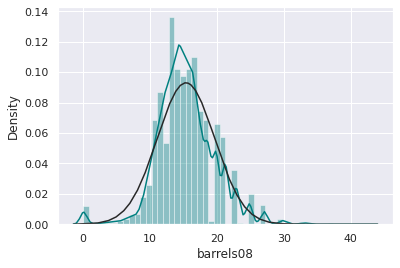

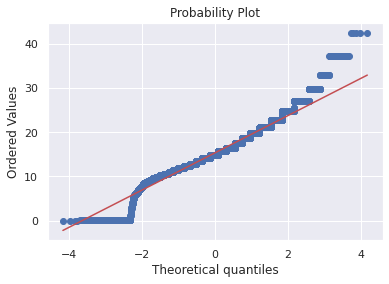

In [ ]:
#histogram and normal probability plot
sns.distplot(data['barrels08'], fit=norm, color='#008080');
fig = plt.figure()
res = stats.probplot(data['barrels08'], plot=plt)

There are data that are close to 0 and interfere with the logarithm. Let's try to separate them.

In [ ]:
data['temp_var'] = pd.Series(len(data['barrels08']), index=data.index)
data['temp_var'] = 0
data.loc[data['barrels08']>1.1,'temp_var'] = 1

In [ ]:
data.loc[data['temp_var']==1,'barrels08'] = np.log(data['barrels08'])

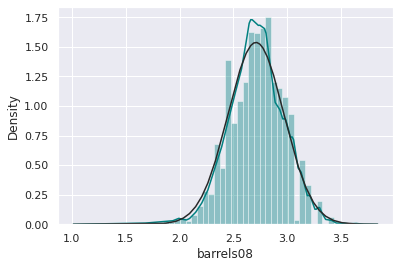

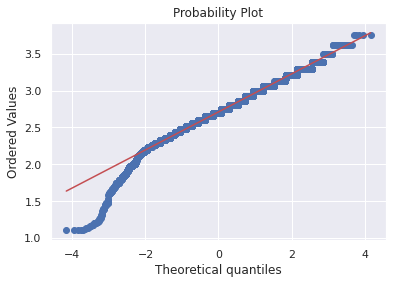

In [ ]:
sns.distplot(data[data['barrels08']>1.1]['barrels08'], fit=norm, color='#008080');
fig = plt.figure()
res = stats.probplot(data[data['barrels08']>1.1]['barrels08'], plot=plt)

In [ ]:
# remove temporary variable
data = data.drop(['temp_var'], axis=1)

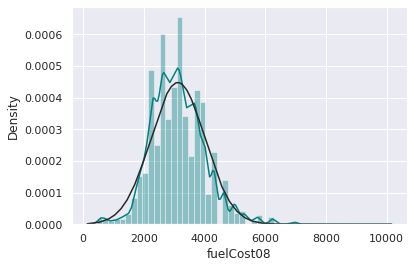

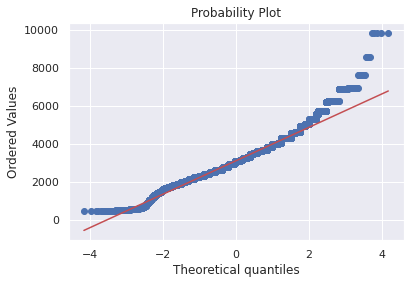

In [ ]:
sns.distplot(data['fuelCost08'], fit=norm, color='#008080');
fig = plt.figure()
res = stats.probplot(data['fuelCost08'], plot=plt)



In [ ]:
data['fuelCost08'] = np.log(data['fuelCost08'])
data['highway08'] = np.log(data['highway08'])

In [ ]:
# look at dataframe
data.head()

,barrels08,cylinders,displ,drive,fuelCost08,fuelType1,highway08,trany,youSaveSpend
0,2.650925,4.0,2.0,6,7.882315,5,3.218876,37,-3000
1,3.297553,12.0,4.9,6,8.527144,5,2.639057,37,-15000
2,2.399611,4.0,2.2,4,7.625595,5,3.496508,37,0
3,3.297553,8.0,5.2,6,8.527144,5,2.484907,27,-15000
4,2.751009,4.0,2.2,2,8.202482,4,3.135494,37,-8000


In [ ]:
# Separate out the features and targets
features = data.drop(columns='youSaveSpend')
targets = pd.DataFrame(data['youSaveSpend'])

# Split into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(31867, 8)
(13658, 8)
(31867, 1)
(13658, 1)


In [ ]:
# Save the no scores, training, and testing data
X.to_csv('training_features.csv', index = False)
X_test.to_csv('testing_features.csv', index = False)
y.to_csv('training_labels.csv', index = False)
y_test.to_csv('testing_labels.csv', index = False)